## <u>Multiple Linear Regression with Gradient Descent</u>

### Here I am trying to predict house prices using my implementation of vectorized gradient descent.<br>


In [1]:
# import dependecies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading in the dataset
train = pd.read_csv("all/train.csv")

In [3]:
#loading the first five rows of the training data...
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
#dropping the ID column as it is unlikely to have an influence on the house prices 
train.drop('ID', axis = 1, inplace = True)

In [5]:
#displaying "head()" of the modified dataframe
train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
#to get the number of features each training data has(# of columns)
#we'll be initializing a randomized "weights vector" which has length = # of columns
train.shape

(333, 14)

In [7]:
#initializing vector of random parameters(these will be learned through the course of gradient descent)

param = np.random.uniform(low = 0.75, high = 1.5, size = (14,1))

In [8]:
#separating features and output columns

X = np.array(train.iloc[:, 0:13])
y = np.array(train.iloc[:, 13])
y = y.reshape(y.shape[0], 1)

In [9]:
#we need to scale our features to the same range of values, else, the numerically higher values will have higher 
#dominance when learning parameters

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
#i chose not to scale y, so that i get my predicted values in the same range as the training values,
#since the submission_example.csv file needs the predicted values in the training data scale(ie, price in $1000s)

#creating an extra column of ones for the bias term and appending it as the leftmost column of X
X = np.insert(X, 0, 1, axis = 1)


In [10]:
#defining a gradient descent function that takes in the augmented X_train, randomized parameters and y_train
def sgd(X, param, y):
    alpha = 0.01 #specifying learning rate
    X_t = X.transpose() #storing the transpose of X
    for i in range(1000):
        #hypothesis for each training example
        prediction_vector = np.matmul(X, param)
        #error for each training example
        error_vector = prediction_vector - y
        #convert the error vector into diagonalized error_mat for vectorized implementation of Batch update
        error_mat = np.diag(error_vector.transpose()[0])
        #calculating the gradient vector
        gradient_vector = np.sum(np.matmul(X.transpose(), error_mat), axis = 1)
        gradient_vector = gradient_vector.reshape(gradient_vector.shape[0], 1)
        #changing parameters according to the newly found gradient vector
        param = param - ((alpha/X.shape[0])*gradient_vector)
        cost = (1/(2*X.shape[0]))*np.sum(np.square(np.matmul(X,param)-y))
        plt.scatter(cost, i, color='g', s=20)
#         print(cost)
    plt.xlabel("Cost")
    plt.ylabel("Iterations")
    plt.title("Iterations vs Cost")
    plt.show()
    return param 

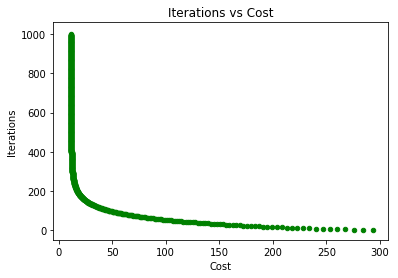

array([[ 2.27678333e+01],
       [-2.08330997e-01],
       [ 8.30439970e-01],
       [ 2.21458392e-03],
       [ 9.40244193e-01],
       [-1.27024465e+00],
       [ 2.86683932e+00],
       [-2.40881183e-01],
       [-2.65693220e+00],
       [ 1.71803055e+00],
       [-1.10805895e+00],
       [-1.71387456e+00],
       [ 1.05993575e+00],
       [-4.14371751e+00]])

In [11]:
#plotting the graph of iterations vs cost, and displaying the parameters learned from the training data
%matplotlib inline
learned_param = sgd(X, param, y)
learned_param

In [12]:
#the following command guarantees to display values in decimal notation, as opposed to, scientific notation...
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000,-0.457,0.323,-1.286,-0.253,-0.167,0.440,-0.108,0.192,-0.989,-0.664,-1.465,0.433,-1.068
1,1.000,-0.454,-0.472,-0.604,-0.253,-0.768,0.221,0.380,0.636,-0.875,-0.981,-0.302,0.433,-0.478
2,1.000,-0.453,-0.472,-1.304,-0.253,-0.864,1.042,-0.798,1.189,-0.760,-1.098,0.117,0.407,-1.357
3,1.000,-0.448,-0.472,-1.304,-0.253,-0.864,1.254,-0.499,1.189,-0.760,-1.098,0.117,0.433,-1.018
4,1.000,-0.446,0.080,-0.490,-0.253,-0.289,-0.361,-0.058,0.936,-0.531,-0.576,-1.512,0.418,-0.012


In [13]:
#storing predicted values for the training data
y_train_pred = np.matmul(X, learned_param)

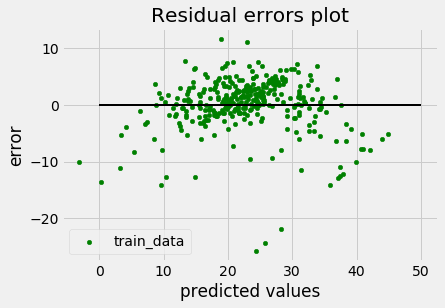

In [14]:
#residual errors plot for the predicted value for the training data
plt.style.use("fivethirtyeight")
plt.scatter(y_train_pred, y_train_pred - y, color = 'g', s = 20, label = 'train_data')
plt.title('Residual errors plot')
plt.legend(loc = 'lower left')
plt.xlabel('predicted values')
plt.ylabel('error')

#line through zero error has been highlighted
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.show()

In [15]:
x_test = pd.read_csv("all/test.csv")
x_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030
1,6,0.030,0.000,2.180,0,0.458,6.430,58.700,6.062,3,222,18.700,394.120,5.210
2,8,0.145,12.500,7.870,0,0.524,6.172,96.100,5.950,5,311,15.200,396.900,19.150
3,9,0.211,12.500,7.870,0,0.524,5.631,100.000,6.082,5,311,15.200,386.630,29.930
4,10,0.170,12.500,7.870,0,0.524,6.004,85.900,6.592,5,311,15.200,386.710,17.100


In [16]:
x_test.drop('ID', axis = 1, inplace = True)
pd.read_csv("all/submission_example.csv").head()

,ID,medv
0,3,22.769
1,6,22.769
2,8,22.769
3,9,22.769
4,10,22.769


In [17]:
y_test = pd.read_csv('all/test.csv')
y_test = y_test.loc[:,'ID']
x_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030
1,0.030,0.000,2.180,0,0.458,6.430,58.700,6.062,3,222,18.700,394.120,5.210
2,0.145,12.500,7.870,0,0.524,6.172,96.100,5.950,5,311,15.200,396.900,19.150
3,0.211,12.500,7.870,0,0.524,5.631,100.000,6.082,5,311,15.200,386.630,29.930
4,0.170,12.500,7.870,0,0.524,6.004,85.900,6.592,5,311,15.200,386.710,17.100


In [18]:
#scaling the test data
sc_x_test = StandardScaler()
x_test = sc_x_test.fit_transform(x_test)
x_test = np.insert(x_test, 0, 1, axis = 1)

/home/aathi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/aathi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
#storing the predicted house values(in $1000s) into y_pred
y_pred = pd.DataFrame(np.matmul(x_test, learned_param))
y_pred.head()

,0
0,31.133
1,25.887
2,18.970
3,10.312
4,18.691


In [20]:
id_test = pd.read_csv('all/test.csv')
submission = pd.Series(y_pred.iloc[:,0]) 
ind = pd.Series(id_test.loc[:, 'ID'])
final_df = pd.DataFrame(pd.concat([ind, submission], axis = 1))
final_df.rename(columns = {0:'medv'}, inplace = True)
final_df.index = np.arange(1, len(final_df)+1)
final_df.head()

,ID,medv
1,3,31.133
2,6,25.887
3,8,18.970
4,9,10.312
5,10,18.691


In [21]:
final_df.to_csv('submission.csv')

In [22]:
read = pd.read_csv('submission.csv')
read.head()

,Unnamed: 0,ID,medv
0,1,3,31.133
1,2,6,25.887
2,3,8,18.970
3,4,9,10.312
4,5,10,18.691


In [23]:
train.isnull().values.any()

False

In [24]:
train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000
mean,3.360,10.689,11.293,0.060,0.557,6.266,68.226,3.710,9.634,409.279,18.448,359.466,12.515,22.769
std,7.352,22.675,6.998,0.238,0.115,0.704,28.133,1.981,8.742,170.842,2.152,86.585,7.068,9.173
min,0.006,0.000,0.740,0.000,0.385,3.561,6.000,1.130,1.000,188.000,12.600,3.500,1.730,5.000
25%,0.079,0.000,5.130,0.000,0.453,5.884,45.400,2.122,4.000,279.000,17.400,376.730,7.180,17.400
50%,0.262,0.000,9.900,0.000,0.538,6.202,76.700,3.092,5.000,330.000,19.000,392.050,10.970,21.600
75%,3.678,12.500,18.100,0.000,0.631,6.595,93.800,5.117,24.000,666.000,20.200,396.240,16.420,25.000
max,73.534,100.000,27.740,1.000,0.871,8.725,100.000,10.710,24.000,711.000,21.200,396.900,37.970,50.000
